In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


# Load data
df = pd.read_csv("rfm_data.csv")
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [2]:
df.dtypes

CustomerID              int64
PurchaseDate           object
TransactionAmount     float64
ProductInformation     object
OrderID                 int64
Location               object
dtype: object

In [3]:
import pandas as pd
from datetime import datetime

# Assuming you have a DataFrame named df with your dataset

# Convert 'PurchaseDate' column to datetime type
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

# Get the current date
current_date = datetime.now()

# Calculate recency for each customer
df['Recency'] = (current_date - df['PurchaseDate']).dt.days


In [4]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,353
1,2188,2023-04-11,463.70,Product A,176819,London,353
2,4608,2023-04-11,80.28,Product A,340062,New York,353
3,2559,2023-04-11,221.29,Product A,239145,London,353
4,9482,2023-04-11,739.56,Product A,194545,Paris,353


In [5]:
import pandas as pd

# Assuming you have a DataFrame named df with your dataset

# Frequency: Count the number of transactions per CustomerID
frequency_df = df.groupby('CustomerID').size().reset_index(name='Frequency')

# Monetary: Sum TransactionAmount per CustomerID
monetary_df = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index(name='Monetary')

# Merge frequency and monetary DataFrames with the original DataFrame
df = pd.merge(df, frequency_df, on='CustomerID', how='left')
df = pd.merge(df, monetary_df, on='CustomerID', how='left')

In [6]:
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,353,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,353,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,353,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,353,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,353,1,739.56
...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,293,1,759.62
996,6669,2023-06-10,941.50,Product C,987025,New York,293,1,941.50
997,8836,2023-06-10,545.36,Product C,512842,London,293,1,545.36
998,1440,2023-06-10,729.94,Product B,559753,Paris,293,1,729.94


In [7]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,353,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,353,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,353,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,353,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,353,1,739.56


In [8]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
df['RecencyScore'] = pd.cut(df['Recency'], bins=5, labels=recency_scores)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins=5, labels=frequency_scores)
df['MonetaryScore'] = pd.cut(df['Monetary'], bins=5, labels=monetary_scores)

In [9]:
df['RecencyScore'] = df['RecencyScore'].astype(int)
df['FrequencyScore'] = df['FrequencyScore'].astype(int)
df['MonetaryScore'] = df['MonetaryScore'].astype(int)


In [10]:
# Calculate RFM score by combining the individual scores
df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
df['Value Segment'] = pd.qcut(df['RFM_Score'], q=3, labels=segment_labels)

In [11]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,353,1,943.31,1,1,2,4,Low-Value
1,2188,2023-04-11,463.70,Product A,176819,London,353,1,463.70,1,1,1,3,Low-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,353,1,80.28,1,1,1,3,Low-Value
3,2559,2023-04-11,221.29,Product A,239145,London,353,1,221.29,1,1,1,3,Low-Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,353,1,739.56,1,1,2,4,Low-Value


In [49]:
def display_segment_dist():
    # Calculate segment counts
    segment_counts = df['Value Segment'].value_counts().reset_index()
    segment_counts.columns = ['Value Segment', 'Count']

# Define pastel colors
    pastel_colors = ['#FFB6C1', '#FFD700', '#98FB98', '#ADD8E6', '#FFA07A']

# Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(segment_counts['Value Segment'], segment_counts['Count'], color=pastel_colors)
    plt.title('RFM Value Segment Distribution')
    plt.xlabel('RFM Value Segment')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    return plt.gcf()

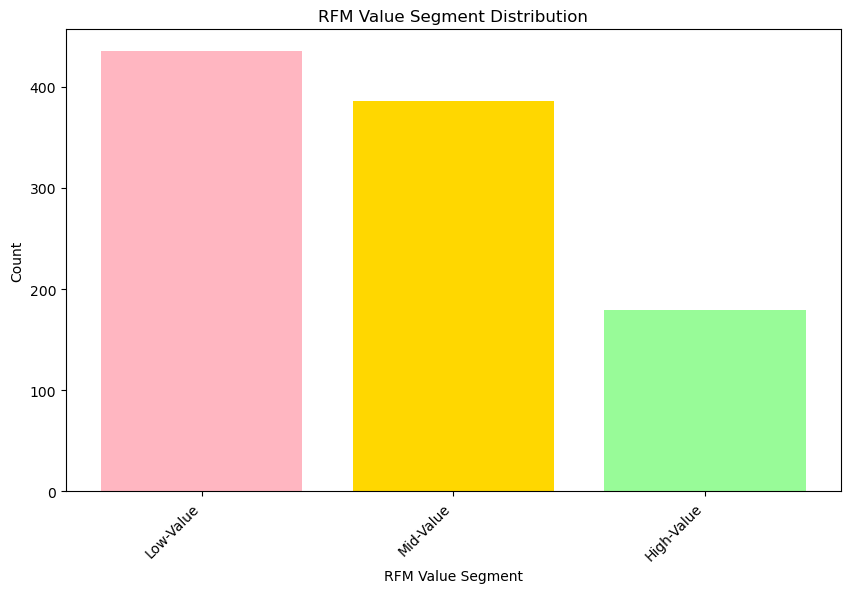

In [25]:
display_segment_dist()

In [13]:
# Create a new column for RFM Customer Segments
df['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
df.loc[df['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
df.loc[(df['RFM_Score'] >= 6) & (df['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
df.loc[(df['RFM_Score'] >= 5) & (df['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
df.loc[(df['RFM_Score'] >= 4) & (df['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
df.loc[(df['RFM_Score'] >= 3) & (df['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

# the updated data with RFM segments
df[['CustomerID', 'RFM Customer Segments']]


,CustomerID,RFM Customer Segments
0,8814,Can't Lose
1,2188,Lost
2,4608,Lost
3,2559,Lost
4,9482,Can't Lose
...,...,...
995,2970,Potential Loyalists
996,6669,Potential Loyalists
997,8836,Potential Loyalists
998,1440,Potential Loyalists


In [48]:
def display_treemap_segment_product():
    
    segment_product_counts = df.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

    segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

    fig_treemap_segment_product = px.treemap(segment_product_counts, 
                                         path=['Value Segment', 'RFM Customer Segments'], 
                                         values='Count',
                                         color='Value Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')
    fig_treemap_segment_product.show()
    
    return plt.gcf()

In [27]:
display_treemap_segment_product()

In [47]:
def rfm_values_dist_champions_data():
# Filter the data to include only the customers in the Champions segment
    champions_segment = df[df['RFM Customer Segments'] == 'Champions']

# Create box plots using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.boxplot([champions_segment['RecencyScore'], champions_segment['FrequencyScore'], champions_segment['MonetaryScore']],
            labels=['Recency', 'Frequency', 'Monetary'])
    plt.title('Distribution of RFM Values within Champions Segment')
    plt.xlabel('RFM Value')
    plt.ylabel('Score')
    plt.grid(True)
    plt.show()
    
    return plt.gcf()

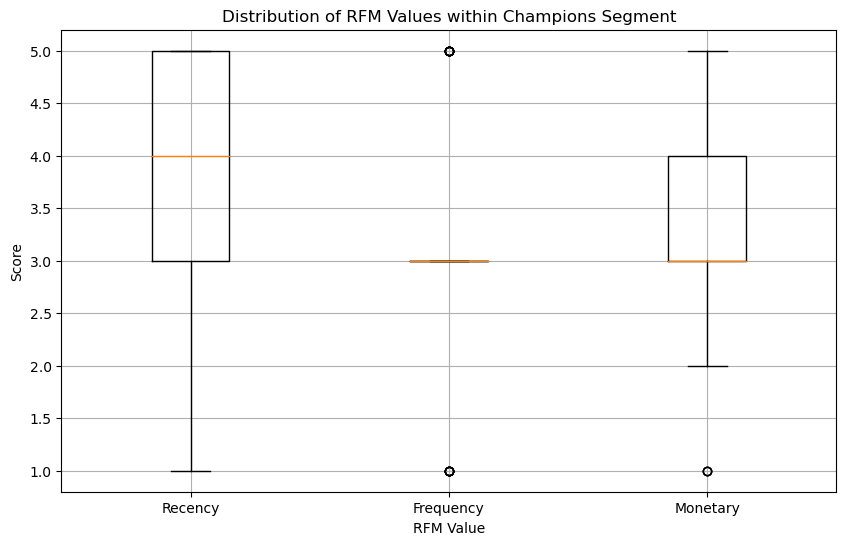

In [36]:
rfm_values_dist_champions_data()

In [28]:
def display_corr_heatmap():
# Calculate correlation matrix
    correlation_matrix = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

# Create heatmap using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of RFM Values within Champions Segment')
    plt.xlabel('RFM Value')
    plt.ylabel('RFM Value')
    plt.show()
    
    return plt.gcf()

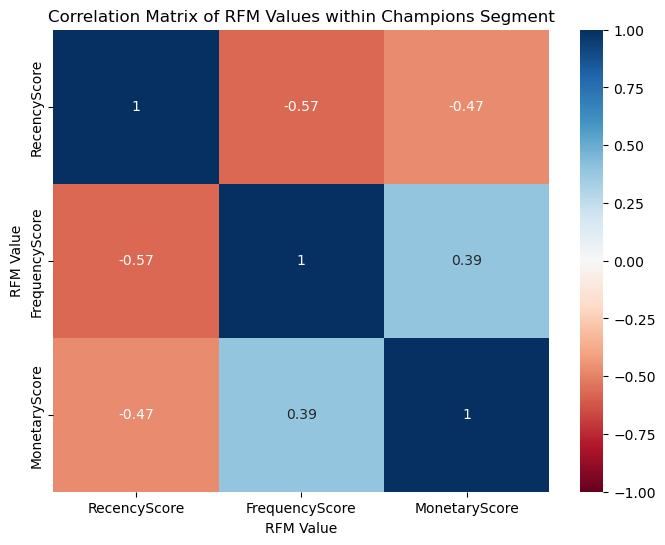

In [29]:
display_corr_heatmap()

In [30]:

def display_segment_comparison():
    
# Calculate segment counts
    segment_counts = df['RFM Customer Segments'].value_counts()

# Define colors
    pastel_colors = [(0.984, 0.705, 0.682), (0.702, 0.871, 0.882), (0.769, 0.855, 0.678), (0.988, 0.816, 0.705), (0.965, 0.725, 0.792)]
    champions_color = (0.620, 0.789, 0.882)

# Create the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(segment_counts.index, segment_counts.values, color=[champions_color if segment == 'Champions' else pastel_colors[i] for i, segment in enumerate(segment_counts.index)])

# Update the layout
    plt.title('Comparison of RFM Segments')
    plt.xlabel('RFM Segments')
    plt.ylabel('Number of Customers')

# Show the bar chart
    plt.xticks(rotation=45, ha='right')
    plt.show()
    return plt.gcf()

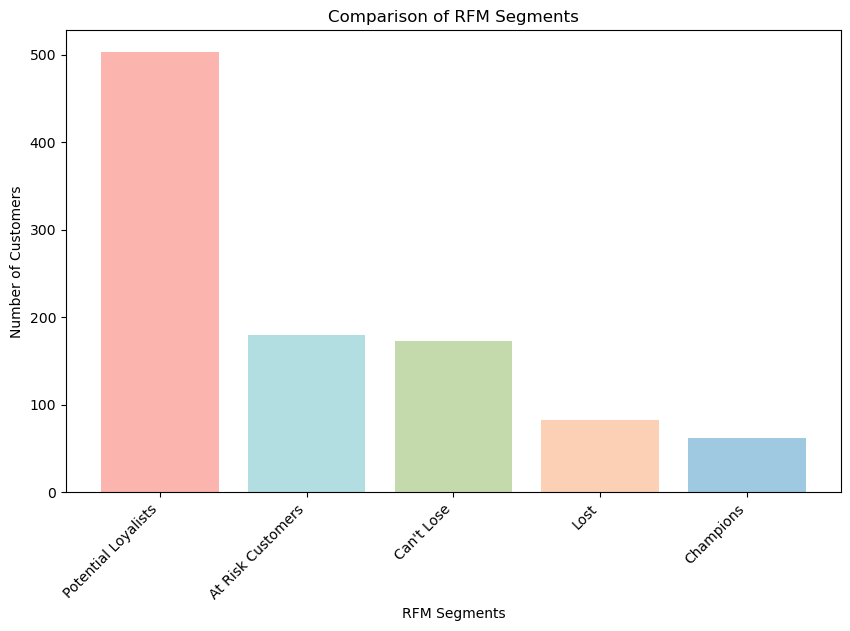

In [34]:
display_segment_comparison()

In [42]:
import matplotlib.pyplot as plt
def display_segment_scores():
    

# Calculate the average Recency, Frequency, and Monetary scores for each segment
    segment_scores = df.groupby('RFM Customer Segments')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()

# Define colors
    colors = [(0.246,0.468,0.680),(0.135,0.357,0.579),(0.467,0.857,0.698)]

# Melt the dataframe for Seaborn
    melted_segment_scores = segment_scores.melt(id_vars='RFM Customer Segments', var_name='Score Type', value_name='Score')

# Create the grouped bar chart using Seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='RFM Customer Segments', y='Score', hue='Score Type', data=melted_segment_scores, palette=colors)
    plt.title('Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores')
    plt.xlabel('RFM Segments')
    plt.ylabel('Score')
    plt.legend(title='Score Type')
    plt.xticks(rotation=45)
    plt.show()
    
    return plt.gcf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [21]:
df.to_csv('modified_data.csv', index=False)

In [37]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,353,1,943.31,1,1,2,4,Low-Value,Can't Lose
1,2188,2023-04-11,463.70,Product A,176819,London,353,1,463.70,1,1,1,3,Low-Value,Lost
2,4608,2023-04-11,80.28,Product A,340062,New York,353,1,80.28,1,1,1,3,Low-Value,Lost
3,2559,2023-04-11,221.29,Product A,239145,London,353,1,221.29,1,1,1,3,Low-Value,Lost
4,9482,2023-04-11,739.56,Product A,194545,Paris,353,1,739.56,1,1,2,4,Low-Value,Can't Lose


In [39]:
import pickle 
pickle_out = open("df.pickle","wb")
pickle.dump(df, pickle_out)
pickle_out.close()